In [3]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [235]:
from pandas import read_csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
print('LIBRERIAS IMPORTADAS')

LIBRERIAS IMPORTADAS


**LECTURA DE DATOS**

In [236]:
#LOADING DATA 
df= read_csv('/content/AguaH.csv')
df = df.iloc[0:100 , :]
df.shape

(100, 89)

In [237]:
#AJUSTE DEL FORMATO DE LAS FECHAS PARA LA TRANSFORMACION A TIPO DATETIME
lookup = {'ENE':'01','FEB':'02','MAR':'03','ABR':'04','MAY':'05','JUN':'06','JUL':'07','AGO':'08','SEP':'09','OCT':'10','NOV':'11','DIC':'12'}
clist=[]
for col in df.columns[5:]:
    col = col[4:].split('_')
    clist.append('20'+col[1]+'-'+lookup[col[0]]+'-01')

columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16']+clist
df.columns=columns
df = df.drop(columns=['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16'])


In [238]:
#ESTE CODIGO SIRVE UNICAMENTE PARA LA INTEGRACION DE LOS NOMBRES EN EL DATAFRAME
col_list = ["Name"]
names = pd.read_csv("/content/StateNames.csv", usecols=col_list)
names = names.iloc[0:100 , :]
df.insert(loc=0, column='', value=names)
encoded=pd.get_dummies(df.iloc[:,0])
df=pd.concat([df,encoded], axis=1)
#ELIMINAMOS LA COLUMNA DE LOS NOMBRE YA QUE SE BINARIZARON
df = df.iloc[: , 1:]
df.head()

,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01,2012-01-01,2012-02-01,2012-03-01,2012-04-01,...,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,Agnes,Alice,Anna,Annie,Clara,Daisy,Dorothy,Edna,Elizabeth,Elsie,Emma,Esther,Ethel,Evelyn,Florence,Frances,Hazel,Helen,Jean,Julia,Katherine,Lillian,Louise,Lucy,Margaret,Marie,Martha,Mary,Mildred,Minnie,Olga,Pauline,Ruth,Sally
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,7.0,7.0,42.0,27.0,22.0,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,15.0,16.0,13.0,17.0,17.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,10.0,12.0,9.0,6.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,4.0,34.0,18.0,9.0,24.0,20.0,15.0,7.0,8.0,8.0,7.0,11.0,10.0,16.0,...,18.0,18.0,17.0,17.0,18.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,28.0,31.0,27.0,27.0,27.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
df.shape

(100, 118)

In [195]:

#RELLENANDO VALORES NAN POR LA MEDIA
df=df.fillna(20)
df.index.name = 'date'
#CONVIRTIENDO EL INDICE DEL DATAFRAME EN TIPO DATETIME
df.index = pd.to_datetime(df.index)
type(df.index)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
,Mary,Annie,Anna,Margaret,Helen,Elsie,Lucy,Dorothy,Mary,Margaret,Ruth,Annie,Elizabeth,Helen,Mary,Elsie,Agnes,Anna,Helen,Louise,Jean,Ruth,Alice,Esther,Ethel,Margaret,Marie,Mary,Elizabeth,Margaret,Helen,Alice,Annie,Louise,Mary,Margaret,Alice,Annie,Elizabeth,Helen,...,Martha,Annie,Clara,Emma,Hazel,Julia,Marie,Minnie,Pauline,Mary,Helen,Dorothy,Frances,Ruth,Alice,Anna,Agnes,Annie,Julia,Lillian,Margaret,Daisy,Edna,Esther,Evelyn,Florence,Katherine,Louise,Lucy,Marie,Sally,Mary,Margaret,Helen,Frances,Alice,Olga,Ruth,Clara,Dorothy
2009-01-01,20,20,20,20,20,20,20,30,20,19,20,20,9,20,20,14,20,20,20,20,20,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,25,20,14,20,15,6,20,20,20,20,20,14,20,20,20,15,41,20,11,14,25,20,20,20,27,20,20,18,20,1,20,18,20
2009-02-01,20,30,20,20,20,20,20,10,20,21,20,20,12,20,20,14,20,20,20,20,30,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,25,20,14,20,15,5,20,20,20,20,20,14,20,20,20,15,42,20,9,14,25,20,20,20,24,20,20,19,20,0,20,13,20
2009-03-01,20,30,20,20,20,20,20,30,20,21,20,20,13,20,20,14,20,20,20,20,30,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,30,...,20,20,20,20,20,20,20,22,20,2,20,15,6,20,20,20,20,20,14,20,20,20,13,35,20,10,14,25,20,20,20,17,20,20,15,20,1,20,14,20
2009-04-01,20,30,20,20,20,20,20,20,20,22,20,20,13,20,20,14,20,20,20,20,30,0,25,14,20,6,14,20,18,14,25,20,20,20,20,20,20,20,20,30,...,20,20,20,20,20,20,20,21,20,0,20,15,6,20,20,20,8,20,14,20,20,20,14,40,20,10,14,25,20,20,20,12,6,13,15,20,0,20,18,20


In [204]:
y=df.iloc[: , -1]
dataset=df.iloc[:, :-1]
x=dataset
values = dataset.values
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaT,Mary,Annie,Anna,Margaret,Helen,Elsie,Lucy,Dorothy,Mary,Margaret,Ruth,Annie,Elizabeth,Helen,Mary,Elsie,Agnes,Anna,Helen,Louise,Jean,Ruth,Alice,Esther,Ethel,Margaret,Marie,Mary,Elizabeth,Margaret,Helen,Alice,Annie,Louise,Mary,Margaret,Alice,Annie,Elizabeth,Helen,...,Katherine,Martha,Annie,Clara,Emma,Hazel,Julia,Marie,Minnie,Pauline,Mary,Helen,Dorothy,Frances,Ruth,Alice,Anna,Agnes,Annie,Julia,Lillian,Margaret,Daisy,Edna,Esther,Evelyn,Florence,Katherine,Louise,Lucy,Marie,Sally,Mary,Margaret,Helen,Frances,Alice,Olga,Ruth,Clara
2009-01-01,20,20,20,20,20,20,20,30,20,19,20,20,9,20,20,14,20,20,20,20,20,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,25,20,14,20,15,6,20,20,20,20,20,14,20,20,20,15,41,20,11,14,25,20,20,20,27,20,20,18,20,1,20,18
2009-02-01,20,30,20,20,20,20,20,10,20,21,20,20,12,20,20,14,20,20,20,20,30,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,25,20,14,20,15,5,20,20,20,20,20,14,20,20,20,15,42,20,9,14,25,20,20,20,24,20,20,19,20,0,20,13
2009-03-01,20,30,20,20,20,20,20,30,20,21,20,20,13,20,20,14,20,20,20,20,30,0,25,14,20,20,14,20,18,14,25,20,20,20,20,20,20,20,20,30,...,20,20,20,20,20,20,20,20,22,20,2,20,15,6,20,20,20,20,20,14,20,20,20,13,35,20,10,14,25,20,20,20,17,20,20,15,20,1,20,14
2009-04-01,20,30,20,20,20,20,20,20,20,22,20,20,13,20,20,14,20,20,20,20,30,0,25,14,20,6,14,20,18,14,25,20,20,20,20,20,20,20,20,30,...,20,20,20,20,20,20,20,20,21,20,0,20,15,6,20,20,20,8,20,14,20,20,20,14,40,20,10,14,25,20,20,20,12,6,13,15,20,0,20,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,7,16,10,18,31,19,17,22,7,3,15,15,39,23,15,5,1,24,14,2,20,25,14,8,21,1,9,5,1,1,20,14,14,5,9,27,15,15,46,19,...,16,10,11,10,24,20,41,24,9,15,11,10,0,18,15,20,18,20,9,6,20,15,16,1,15,29,24,14,15,1,19,20,20,29,49,17,15,7,17,24
2015-09-01,42,13,12,17,27,19,17,27,16,3,15,15,52,22,15,5,1,24,6,2,20,25,13,8,21,2,9,5,1,5,20,14,13,4,9,27,15,15,50,18,...,18,10,12,10,24,19,41,24,9,15,11,11,0,13,15,20,11,20,8,5,20,15,14,1,15,29,24,14,18,1,18,20,20,33,57,10,13,6,14,21
2015-10-01,27,17,9,17,27,18,17,26,7,3,15,15,33,12,15,5,1,24,6,2,19,25,6,7,16,2,9,5,1,4,20,14,10,4,9,39,15,15,46,18,...,16,10,7,10,24,21,41,24,9,15,10,8,0,2,15,20,14,5,11,5,20,15,14,1,15,28,24,14,36,1,17,20,20,17,85,11,12,8,12,19


Grafica del consumo de agua de un usuario

TypeError: ignored

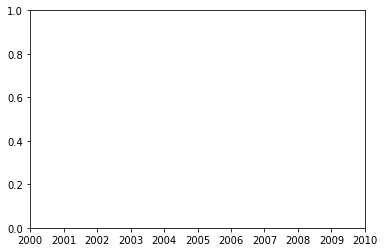

In [203]:
import matplotlib.pyplot as plt

plt.plot(df[[0,1]])
plt.show()

In [ ]:
np.random.seed(7)

In [ ]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
UserData = scaler.fit_transform(UserData)

In [ ]:
UserData = scaler.fit_transform(UserData)

In [ ]:
# split into train and test sets
train_size = int(len(UserData) * 0.67)
test_size = len(UserData) - train_size
train, test = UserData[0:train_size,:], UserData[train_size:len(UserData),:]
print(len(train), len(test))

55 28


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Dense(9))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
53/53 - 2s - loss: 0.0471 - 2s/epoch - 30ms/step
Epoch 2/100
53/53 - 0s - loss: 0.0084 - 96ms/epoch - 2ms/step
Epoch 3/100
53/53 - 0s - loss: 0.0079 - 90ms/epoch - 2ms/step
Epoch 4/100
53/53 - 0s - loss: 0.0072 - 96ms/epoch - 2ms/step
Epoch 5/100
53/53 - 0s - loss: 0.0061 - 90ms/epoch - 2ms/step
Epoch 6/100
53/53 - 0s - loss: 0.0054 - 108ms/epoch - 2ms/step
Epoch 7/100
53/53 - 0s - loss: 0.0046 - 92ms/epoch - 2ms/step
Epoch 8/100
53/53 - 0s - loss: 0.0038 - 91ms/epoch - 2ms/step
Epoch 9/100
53/53 - 0s - loss: 0.0029 - 95ms/epoch - 2ms/step
Epoch 10/100
53/53 - 0s - loss: 0.0026 - 105ms/epoch - 2ms/step
Epoch 11/100
53/53 - 0s - loss: 0.0023 - 90ms/epoch - 2ms/step
Epoch 12/100
53/53 - 0s - loss: 0.0018 - 97ms/epoch - 2ms/step
Epoch 13/100
53/53 - 0s - loss: 0.0016 - 97ms/epoch - 2ms/step
Epoch 14/100
53/53 - 0s - loss: 0.0013 - 87ms/epoch - 2ms/step
Epoch 15/100
53/53 - 0s - loss: 0.0013 - 96ms/epoch - 2ms/step
Epoch 16/100
53/53 - 0s - loss: 0.0012 - 93ms/epoch - 2ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.25 RMSE


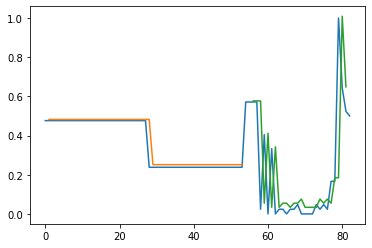

In [ ]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(UserData)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(UserData)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(UserData)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(UserData))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()